# Coronavirus Data Exploration
Getting and displaying COVID-19 data from the Johns Hopkins University Center for Systems Science and Engineering (github repo is at https://github.com/CSSEGISandData/COVID-19). I thought it might be useful to make this a notebook, so other devs could see how to get the data. 

## Get the data 
Download and put it into a data frame. I am extracting data for the United States, and focusing on confirmed cases thus far (rather than deaths or recovery), but all that data is in the data set and it is easy to extract. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objects as go

from state_codes import us_state_abbrev #dictionary from names to state codes

In [3]:
# Full data frame
data_url = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
covid_df = pd.read_csv(data_url)
covid_df = covid_df.rename(columns = {'Province/State':'state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long'})

In [4]:
# Restriction to US data. Oh well
covid_us = covid_df[covid_df['country'] == 'US']
covid_us.head()

state country      lat      long  1/22/20  1/23/20  1/24/20  \
98         Washington      US  47.4009 -121.4905        0        0        0   
99           New York      US  42.1657  -74.9481        0        0        0   
100        California      US  36.1162 -119.6816        0        0        0   
101     Massachusetts      US  42.2302  -71.5301        0        0        0   
102  Diamond Princess      US  35.4437  139.6380        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  3/13/20  3/14/20  3/15/20  3/16/20  \
98         0        0        0  ...      568      572      643      904   
99         0        0        0  ...      421      525      732      967   
100        0        0        0  ...      282      340      426      557   
101        0        0        0  ...      123      138      164      197   
102        0        0        0  ...       46       46       46       47   

     3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  
98      1076     1014     1376     1524     1793     1996  
99      1706     2495     5365     8310    11710    15793  
100      698      751      952     1177     1364     1642  
101      218      218      328      413      525      646  
102       47       47       47       49       49       49  

[5 rows x 65 columns]

In [5]:
## Get state, latitutde, longitude, and total num cases (last column)
covid_us_totals = covid_us.iloc[:, [0, 2, 3, -1]]
covid_us_totals = covid_us_totals.rename(columns = {covid_us_totals.columns[-1]: 'cases'})
covid_us_totals.head(10)

state      lat      long  cases
98         Washington  47.4009 -121.4905   1996
99           New York  42.1657  -74.9481  15793
100        California  36.1162 -119.6816   1642
101     Massachusetts  42.2302  -71.5301    646
102  Diamond Princess  35.4437  139.6380     49
103    Grand Princess  37.6489 -122.6655     30
104           Georgia  33.0406  -83.6431    600
105          Colorado  39.0598 -105.3111    476
106           Florida  27.7663  -81.6868    830
107        New Jersey  40.2989  -74.5210   1914

## Some initial examination of time-series
Sorting is always fun if you want to be terrified. Would be fun to add a 'population' column and calculate the density of cases in each state instead of just the count.

In [6]:
sorted_by_cases = covid_us_totals.sort_values(by = ['cases'], ascending = False)
sorted_by_cases.head(10)

state      lat      long  cases
99        New York  42.1657  -74.9481  15793
98      Washington  47.4009 -121.4905   1996
107     New Jersey  40.2989  -74.5210   1914
100     California  36.1162 -119.6816   1642
110       Illinois  40.3495  -88.9861   1049
146       Michigan  43.3266  -84.5361   1037
138      Louisiana  31.1695  -91.8678    837
106        Florida  27.7663  -81.6868    830
101  Massachusetts  42.2302  -71.5301    646
109          Texas  31.0545  -97.5635    627

I mean, this wouldn't be an analysis if we didn't plot the exponential rise of cases, would it?

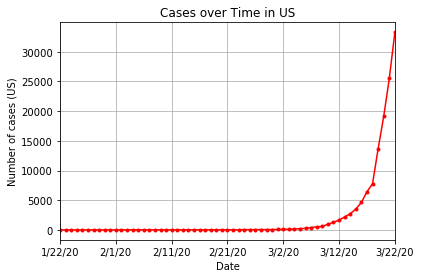

In [7]:
covid_time = covid_us[covid_us.columns[4:]].sum()
covid_time.plot(style = '.', color = 'red',  grid = True);
covid_time.plot(color = 'red', grid = True)
plt.xlabel('Date')
plt.ylabel('Number of cases (US)')
plt.title('Cases over Time in US');

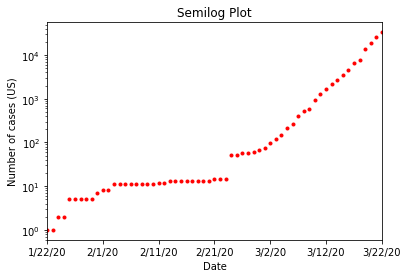

In [8]:
# same plot, semilog
covid_time.plot(style = '.', logy = True, color = 'red');
plt.xlabel('Date')
plt.ylabel('Number of cases (US)')
plt.title('Semilog Plot');

Now we will start using plotly to make interactive plots we can show on a web site. For this first one, we will show the same time-series data, but in one plot with a dropdown menu that lets you select log or linear y axis. Ironically, *these plotly graphs will not show* when you are viewing this notebook in Github you need to run it in interactive mode.

In [10]:
# Plot in plotly with dropdown to select log vs linear
fig_time_dropit = go.Figure()
fig_time_dropit.add_trace(go.Scatter(x=covid_time.index.values, y=covid_time.values,
                    mode='lines+markers',
                    name='Covid over Time',
                    line_color='red'))

fig_time_dropit.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Linear",
                    method="update",
                    args = [{'title': 'Linear scale'},
                            {'yaxis': {'type': 'linear'}}] ),
                dict(label="Log",
                    method="update",
                    args = [{'title': 'Log scale'},
                            {'yaxis': {'type': 'log'}}] )
            ]),
            direction="down",
            pad={"l": 10, "b": 10, "r": 10, "t": 10},
            showactive=True,
            x=0.04,
            xanchor="left",
            y=0.95,
            yanchor="top"),
    ],
    xaxis_title = "Date",
    yaxis_title = "#Cases",
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=0
    ),
)
fig_time_dropit.show()

#If you want a title. add following to update_layout:
#    title={'text': "Coronavirus Incidence over Time",
#           'y':0.85,
#           'x':0.5,
#           'xanchor': 'center',
#           'yanchor': 'top'},

In [23]:
plotly.offline.plot(fig_time_dropit, filename = 'docs/cases_v_time.html');

## On to maps
Plotly has soom cool geospatial data visualization functions. Let's use a couple of them. First we need to extract the  state codes that plotly wants.

In [11]:
# Add appropriate state codes
state_filter = covid_us_totals["state"].isin(us_state_abbrev.keys())
covid_us_totals = covid_us_totals[state_filter]
covid_us_totals['state_code'] = covid_us_totals['state'].map(us_state_abbrev)
covid_us_totals.head()

state      lat      long  cases state_code
98      Washington  47.4009 -121.4905   1996         WA
99        New York  42.1657  -74.9481  15793         NY
100     California  36.1162 -119.6816   1642         CA
101  Massachusetts  42.2302  -71.5301    646         MA
104        Georgia  33.0406  -83.6431    600         GA

### First up, heat map
These are known as *choropleths* to people in the know. TO normal people, they are heat maps. 

In [12]:
# Plot choropleth map (must use log otherwise it looks awful--too many orders of mag)
#tickvals= color_vals,
#ticktext= color_names),

fig = go.Figure(data=go.Choropleth(
    locations=covid_us_totals['state_code'], # Spatial coordinates
    z = np.log10(covid_us_totals['cases'].astype(float)), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    text = covid_us_totals['cases'],
    colorbar=dict(len=0.65,
                  title='#Cases', 
                  tickprefix='1.e',
                  x=0.9,
                  tickvals = [0, 1, 2, 3, 3.699, 4, 4.699],
                  ticktext = ['1', '10', '100', '1,000', '5,000','10,000', '50,000'])))

fig.update_layout(
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=0
    ),
    geo_scope='usa', # limit map scope to USA
)

fig.show()

In [26]:
plotly.offline.plot(fig, filename = 'docs/choropleth.html');

### Bubble map
Note the need to manually make labels and add them as a column to the dataframe for it to show what we want on each bubble.

In [13]:
#Add column for labels
covid_w_labels = covid_us_totals
covid_w_labels['label'] = covid_us_totals['state'] + '<br>' + covid_us_totals['cases'].astype(str)
covid_w_labels.head(5)

# Set size bounds
size_vals = covid_us_totals['cases']
max_marker_size = 75
min_marker_size = 3
sizeref_scale = 2. * max(size_vals) / (max_marker_size ** 2)

# Plot, plotly, plot!
fig = go.Figure(data=go.Scattergeo(
        lon = covid_w_labels['long'],
        lat = covid_us_totals['lat'],
        mode='markers',
        text = covid_w_labels['label'],
        marker=dict(
            size=size_vals,
            sizemode='area',
            sizeref=sizeref_scale,
            sizemin=min_marker_size,
            color = 'Red',
        )))
     
fig.update_layout(
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=0
    ),
    geo_scope='usa', # limit map scope to USA
)


In [28]:
plotly.offline.plot(fig, filename = 'docs/bubble.html');

There we have it -- there is a lot more we could do (see the readme for a list), but this is enough to get started with the data!